In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [210]:
data=pd.read_csv('Advertising Budget and Sales.csv')


In [86]:
data.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [82]:
data.isnull().sum().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.shape

(200, 5)

In [7]:
data.dtypes

Unnamed: 0                   int64
TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

In [8]:
data.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [16]:
col=list(data.columns)

In [18]:
col

['Unnamed: 0',
 'TV Ad Budget ($)',
 'Radio Ad Budget ($)',
 'Newspaper Ad Budget ($)',
 'Sales ($)']

In [9]:
data.duplicated().sum()

0

In [10]:
data[data.duplicated()] ##show the duplicate value

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)


### Outliers

In [212]:
data.describe()

,Unnamed: 0,TVAdBudget,RadioAdBudget,NewspaperAdBudget,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


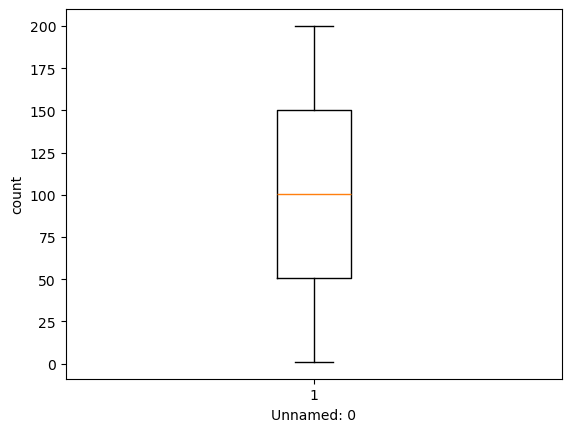

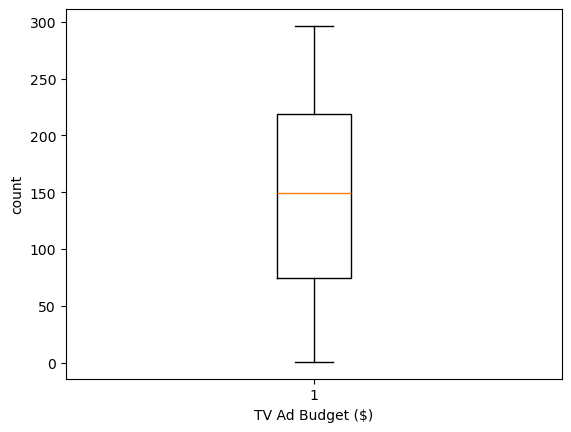

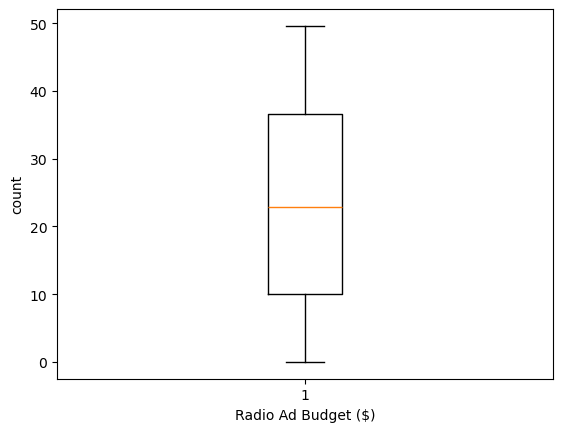

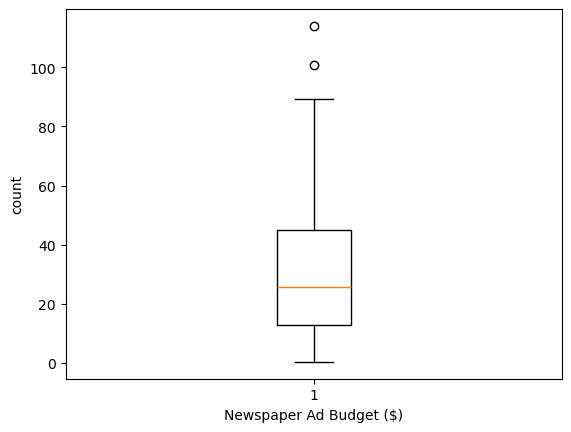

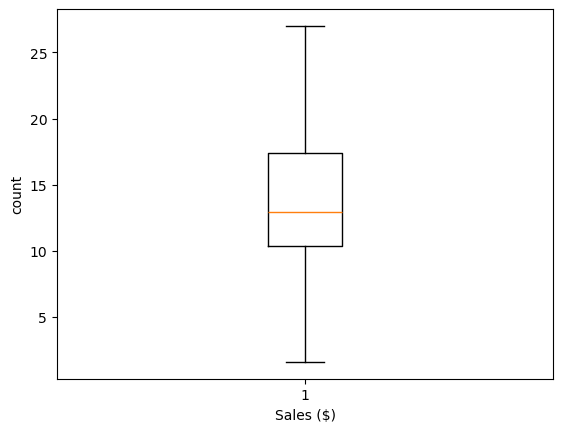

In [90]:
for col_name in col:
    if(data[col_name].dtypes=="int64" or data[col_name].dtypes=="float64"): 
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [214]:
Q1 = data.NewspaperAdBudget.quantile(0.25)

In [216]:
Q3=data.NewspaperAdBudget.quantile(0.75)

In [218]:
Q1

12.75

In [220]:
Q3

45.1

In [222]:
IQR=Q3-Q1

In [224]:
IQR

32.35

In [226]:
LF=Q1-1.5*IQR

In [228]:
LF

-35.775000000000006

In [230]:
HF=Q3+1.5*IQR

In [232]:
HF

93.625

In [236]:
Q1 = data.NewspaperAdBudget.quantile(0.25)
Q3=data.NewspaperAdBudget.quantile(0.75)
IQR=Q3-Q1
data= data[(data.NewspaperAdBudget>=Q1-1.5*IQR) & (data.NewspaperAdBudget<=Q3+1.5*IQR)]


In [238]:
data.shape

(198, 5)

In [242]:
data["NewspaperAdBudget"].value_counts()

NewspaperAdBudget
9.3     3
25.6    3
8.7     3
3.6     2
30.0    2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: count, Length: 170, dtype: int64

In [244]:
data.head()

,Unnamed: 0,TVAdBudget,RadioAdBudget,NewspaperAdBudget,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [533]:
co_list=[]
for col in data.columns:
    if((data[col].dtype!="object") & (col!="Sales")):
        co_list.append(col)        

In [272]:
co_list

['Unnamed: 0', 'TVAdBudget', 'RadioAdBudget', 'NewspaperAdBudget']

In [274]:
X=data[co_list]

In [276]:
X

,Unnamed: 0,TVAdBudget,RadioAdBudget,NewspaperAdBudget
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [401]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [407]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
co_list=[]
for col in data.columns:
    if(col!="Sales"):
        co_list.append(col)        
X=data[co_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

             feature       VIF
0         Unnamed: 0  2.632467
1         TVAdBudget  3.090778
2      RadioAdBudget  3.421327
3  NewspaperAdBudget  3.181916


In [6]:
data=data.drop(["Unnamed: 0"],axis=1)

NameError: name 'data' is not defined

In [421]:
data

,TVAdBudget,RadioAdBudget,NewspaperAdBudget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Adding X and y value in 2 diff. type
#### first_one

In [427]:
X=data.loc[:,["TVAdBudget","RadioAdBudget","NewspaperAdBudget"]]

In [429]:
y=data.iloc[:,-1]

#### second_one

In [520]:
x=data.drop(columns='Sales')
y=data['Sales']

In [522]:
x

,TVAdBudget,RadioAdBudget,NewspaperAdBudget
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [524]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

In [431]:
X

,TVAdBudget,RadioAdBudget,NewspaperAdBudget
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [433]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [36]:
X=data.drop(columns = 'Sales ($)')  
y=data['Sales ($)']

In [443]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) ## random_state use for makes the pattern/data fix for train and test

In [437]:
X_train

,TVAdBudget,RadioAdBudget,NewspaperAdBudget
139,184.9,43.9,1.7
5,8.7,48.9,75.0
67,139.3,14.5,10.2
140,73.4,17.0,12.9
106,25.0,11.0,29.7
...,...,...,...
108,13.1,0.4,25.6
14,204.1,32.9,46.0
93,250.9,36.5,72.3
181,218.5,5.4,27.4


In [445]:
Y_train

139    20.7
5       7.2
67     13.4
140    10.9
106     7.2
       ... 
108     5.3
14     19.0
93     22.2
181    12.2
104    20.7
Name: Sales, Length: 158, dtype: float64

In [447]:
Y_test

66      9.5
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    15.0
160    14.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      10.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    11.9
119     6.6
177    11.7
70     18.3
77     14.2
127     8.8
83     13.6
25     12.0
193    19.6
97     15.5
173    11.7
20     18.0
152    16.6
Name: Sales, dtype: float64

In [453]:
l_model=LinearRegression() #creating the model

In [455]:
l_model.fit(X_train,Y_train) #passing the train data

LinearRegression()

In [461]:
prediction=l_model.predict(X_test) #answer given by my model

In [459]:
prediction

array([ 8.90256277, 12.01306921, 23.21144476,  8.92395077, 10.46730727,
       21.8971966 , 19.19942584, 11.45452564, 14.09761442, 17.80409911,
       14.23800136, 20.78452004,  8.64408107, 12.72572094,  6.6559316 ,
        9.02264615, 10.68293193, 12.59775389,  9.81124446, 11.52734658,
       13.02609227, 17.1241863 , 22.86221509,  6.15063371, 17.18465923,
       20.92972237,  8.04228549, 14.63383829,  6.88807843, 12.27802277,
       17.76134152, 13.69977749,  6.65364677, 14.36955633, 15.60727518,
       18.20272077, 15.28390484, 11.95597478, 18.1794502 , 16.23847994])

In [469]:
error_pred=pd.DataFrame(columns=["Actual_data","Prediction_data"])

In [471]:
error_pred

,Actual_data,Prediction_data


In [473]:
error_pred["Actual_data"]=Y_test  #professor_ ans

In [475]:
error_pred["Prediction_data"]=prediction

In [477]:
error_pred

,Actual_data,Prediction_data
66,9.5,8.902563
116,12.2,12.013069
17,24.4,23.211445
143,10.4,8.923951
158,7.3,10.467307
128,24.7,21.897197
142,20.1,19.199426
31,11.9,11.454526
19,14.6,14.097614
169,15.0,17.804099


In [479]:
error_pred["Error"]=error_pred["Actual_data"]-error_pred["Prediction_data"]

In [481]:
error_pred

,Actual_data,Prediction_data,Error
66,9.5,8.902563,0.597437
116,12.2,12.013069,0.186931
17,24.4,23.211445,1.188555
143,10.4,8.923951,1.476049
158,7.3,10.467307,-3.167307
128,24.7,21.897197,2.802803
142,20.1,19.199426,0.900574
31,11.9,11.454526,0.445474
19,14.6,14.097614,0.502386
169,15.0,17.804099,-2.804099


In [492]:
from sklearn.metrics import *

In [500]:
r2_sc = r2_score(Y_test,prediction)

In [498]:
r2_sc

0.8989454779619588

#### OR

In [540]:
from sklearn import metrics 
print("Mean Absolute Error: ",metrics.mean_absolute_error(Y_test,prediction))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,prediction))
print("Root Mean Squared Error: ",metrics.mean_squared_error(Y_test,prediction,squared=False))
print("R2 Score: ",metrics.r2_score(Y_test,prediction))

Mean Absolute Error:  1.2497394075236379
Mean Squared Error:  2.740911906689994
Root Mean Squared Error:  1.6555699642993025
R2 Score:  0.8989454779619588


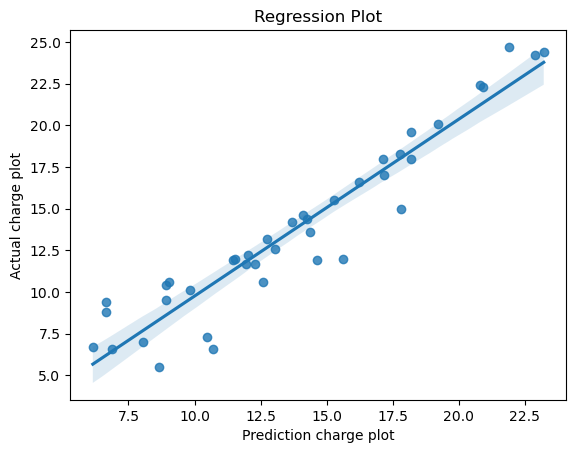

In [502]:
sns.regplot(x=prediction,y=Y_test)
plt.xlabel("Prediction charge plot")
plt.ylabel("Actual charge plot")
plt.title("Regression Plot")
plt.show()